In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans

In [4]:
df= pd.read_csv("/content/Daily Household Transactions.csv")

In [5]:
df.head()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


In [6]:
df.describe()

,Amount
count,2461.000000
mean,2751.145380
std,12519.615804
min,2.000000
25%,35.000000
50%,100.000000
75%,799.000000
max,250000.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            2461 non-null   object 
 1   Mode            2461 non-null   object 
 2   Category        2461 non-null   object 
 3   Subcategory     1826 non-null   object 
 4   Note            1940 non-null   object 
 5   Amount          2461 non-null   float64
 6   Income/Expense  2461 non-null   object 
 7   Currency        2461 non-null   object 
dtypes: float64(1), object(7)
memory usage: 153.9+ KB


In [8]:
df.isnull().sum()

Date                0
Mode                0
Category            0
Subcategory       635
Note              521
Amount              0
Income/Expense      0
Currency            0
dtype: int64

In [9]:
df.count()

Date              2461
Mode              2461
Category          2461
Subcategory       1826
Note              1940
Amount            2461
Income/Expense    2461
Currency          2461
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.count()

Date              1563
Mode              1563
Category          1563
Subcategory       1563
Note              1563
Amount            1563
Income/Expense    1563
Currency          1563
dtype: int64

In [12]:
df.isnull().sum()

Date              0
Mode              0
Category          0
Subcategory       0
Note              0
Amount            0
Income/Expense    0
Currency          0
dtype: int64

In [13]:
df

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR
...,...,...,...,...,...,...,...,...
2329,23/02/2015 19:37:47,Cash,Transportation,Train,Place 0 to Bandra,20.0,Expense,INR
2330,23/02/2015 18:39:59,Cash,Apparel,Footwear,shoe polish,20.0,Expense,INR
2331,23/02/2015 15:43:13,Credit Card,Transportation,train,to and fro Mum to BRC,526.0,Expense,INR
2333,19/02/2015 20:52:01,Cash,Health,Health,face mask,45.0,Expense,INR


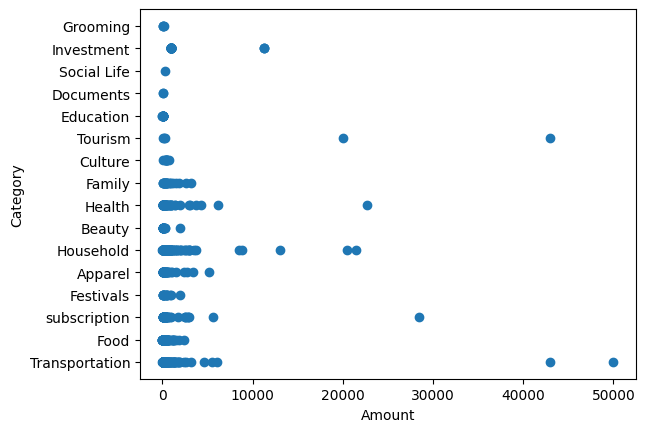

In [14]:
plt.scatter(df['Amount'],df['Category'])
plt.xlabel('Amount')
plt.ylabel('Category')
plt.show()

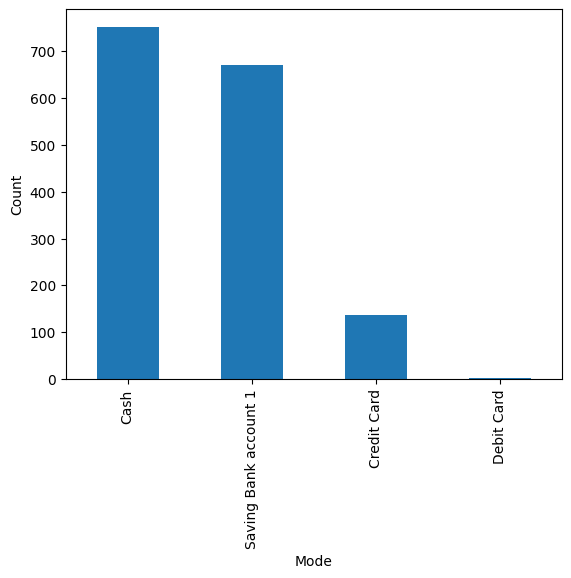

In [15]:
payment__mode_count = df['Mode'].value_counts()
payment__mode_count.plot(kind='bar')
plt.xlabel('Mode')
plt.ylabel('Count')
plt.show()

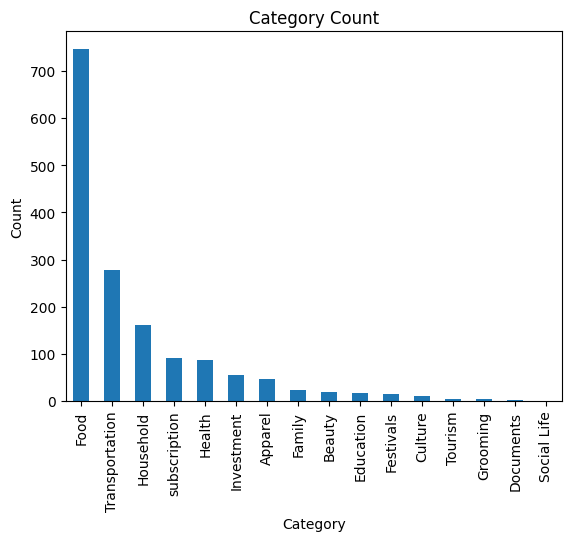

In [16]:
category_count = df['Category'].value_counts()
category_count.plot(kind='bar')
plt.title('Category Count')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

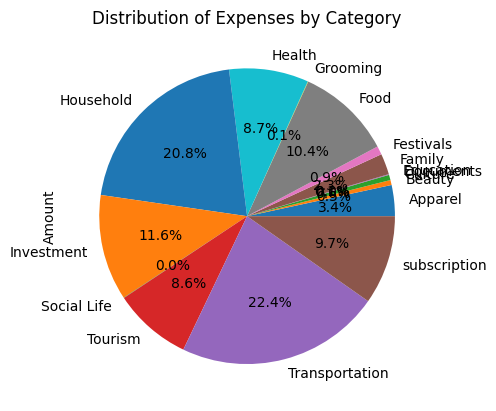

In [17]:
df.groupby('Category')['Amount'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Expenses by Category')
plt.show()

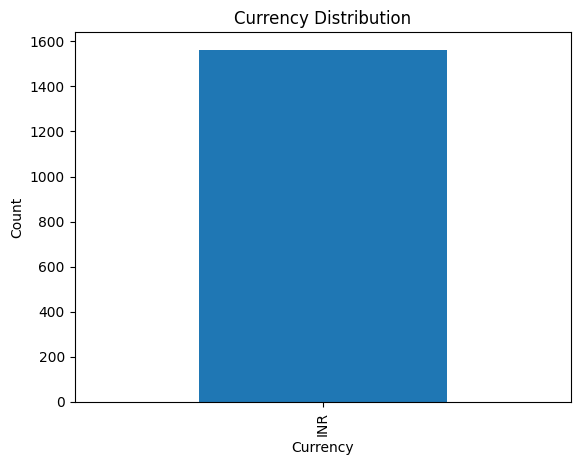

In [18]:
curr_count = df['Currency'].value_counts()
curr_count.plot(kind='bar')
plt.title('Currency Distribution')
plt.xlabel('Currency')
plt.ylabel('Count')
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler
selected_columns = ['Amount','Category', 'Subcategory']
data_selected = df[selected_columns]

In [20]:
data_encoded = pd.get_dummies(data_selected,columns=['Category','Subcategory'])

In [21]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)

In [22]:
data_scaled_df = pd.DataFrame(data_scaled, columns=data_encoded.columns)
data_scaled_df.head()

,Amount,Category_Apparel,Category_Beauty,Category_Culture,Category_Documents,Category_Education,Category_Family,Category_Festivals,Category_Food,Category_Grooming,...,Subcategory_gift,Subcategory_grooming,Subcategory_home decor,Subcategory_makeup,Subcategory_medicine,Subcategory_misc,Subcategory_ropeway,Subcategory_snacks,Subcategory_train,Subcategory_vegetables
0,-0.177219,-0.174135,-0.110931,-0.080244,-0.035794,-0.107937,-0.122209,-0.101699,-0.955561,-0.050653,...,-0.035794,-0.104862,-0.050653,-0.025302,-0.035794,-0.067072,-0.025302,-0.281815,-0.110931,-0.101699
1,-0.165255,-0.174135,-0.110931,-0.080244,-0.035794,-0.107937,-0.122209,-0.101699,1.046506,-0.050653,...,-0.035794,-0.104862,-0.050653,-0.025302,-0.035794,-0.067072,-0.025302,3.548423,-0.110931,-0.101699
2,-0.109820,-0.174135,-0.110931,-0.080244,-0.035794,-0.107937,-0.122209,-0.101699,-0.955561,-0.050653,...,-0.035794,-0.104862,-0.050653,-0.025302,-0.035794,-0.067072,-0.025302,-0.281815,-0.110931,-0.101699
3,-0.181606,-0.174135,-0.110931,-0.080244,-0.035794,-0.107937,-0.122209,-0.101699,-0.955561,-0.050653,...,-0.035794,-0.104862,-0.050653,-0.025302,-0.035794,-0.067072,-0.025302,-0.281815,-0.110931,-0.101699
4,-0.089082,-0.174135,-0.110931,-0.080244,-0.035794,-0.107937,-0.122209,9.832980,-0.955561,-0.050653,...,-0.035794,-0.104862,-0.050653,-0.025302,-0.035794,-0.067072,-0.025302,-0.281815,-0.110931,-0.101699


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

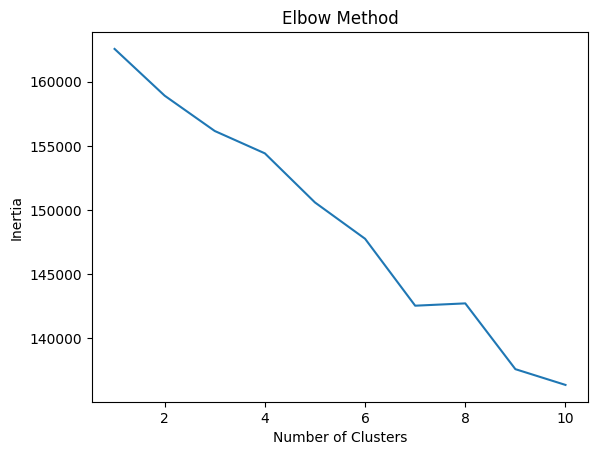

In [23]:
inertia = []
for n in range (1,11):
  kmeans = KMeans(n_clusters=n, random_state=0)
  kmeans.fit(data_scaled_df)
  inertia.append(kmeans.inertia_)
  # Plot after the loop when inertia has 10 values
plt.plot(range(1,11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [36]:
optimal_clusters = 8
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
kmeans.fit(data_scaled_df)

df['Cluster'] = kmeans.labels_
print(df.head())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                  Date                   Mode        Category  \
0  20/09/2018 12:04:08                   Cash  Transportation   
1  20/09/2018 12:03:15                   Cash            Food   
2           19/09/2018  Saving Bank account 1    subscription   
3  17/09/2018 23:41:17  Saving Bank account 1    subscription   
4  16/09/2018 17:15:08                   Cash       Festivals   

               Subcategory                         Note  Amount  \
0                    Train         2 Place 5 to Place 0    30.0   
1                   snacks  Idli medu Vada mix 2 plates    60.0   
2                  Netflix         1 month subscription   199.0   
3  Mobile Service Provider            Data booster pack    19.0   
4             Ganesh Pujan                  Ganesh idol   251.0   

  Income/Expense Currency  Cluster  
0        Expense      INR        0  
1        Expense      INR        1  
2        Expense      INR        1  
3        Expense      INR        1  
4        Expense     

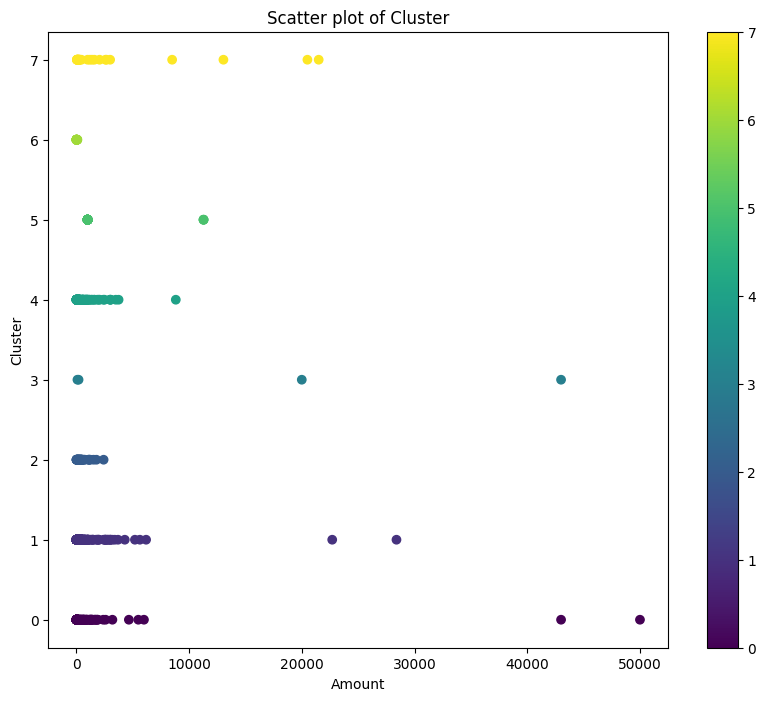

In [37]:
df['Cluster'] = kmeans.labels_
plt.figure(figsize=(10, 8))
plt.scatter(df['Amount'], df['Cluster'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Amount')
plt.ylabel('Cluster')
plt.title('Scatter plot of Cluster')
plt.colorbar()
plt.show()